In [78]:
import numpy as np
import matplotlib.pyplot as plt
from AtomicKANLayer import AtomicKANLayer
import torch
import torch.nn as nn
from kan import KAN
from scipy.stats import pearsonr
from kernel import *

In [79]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 10,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.dpi': 300
})

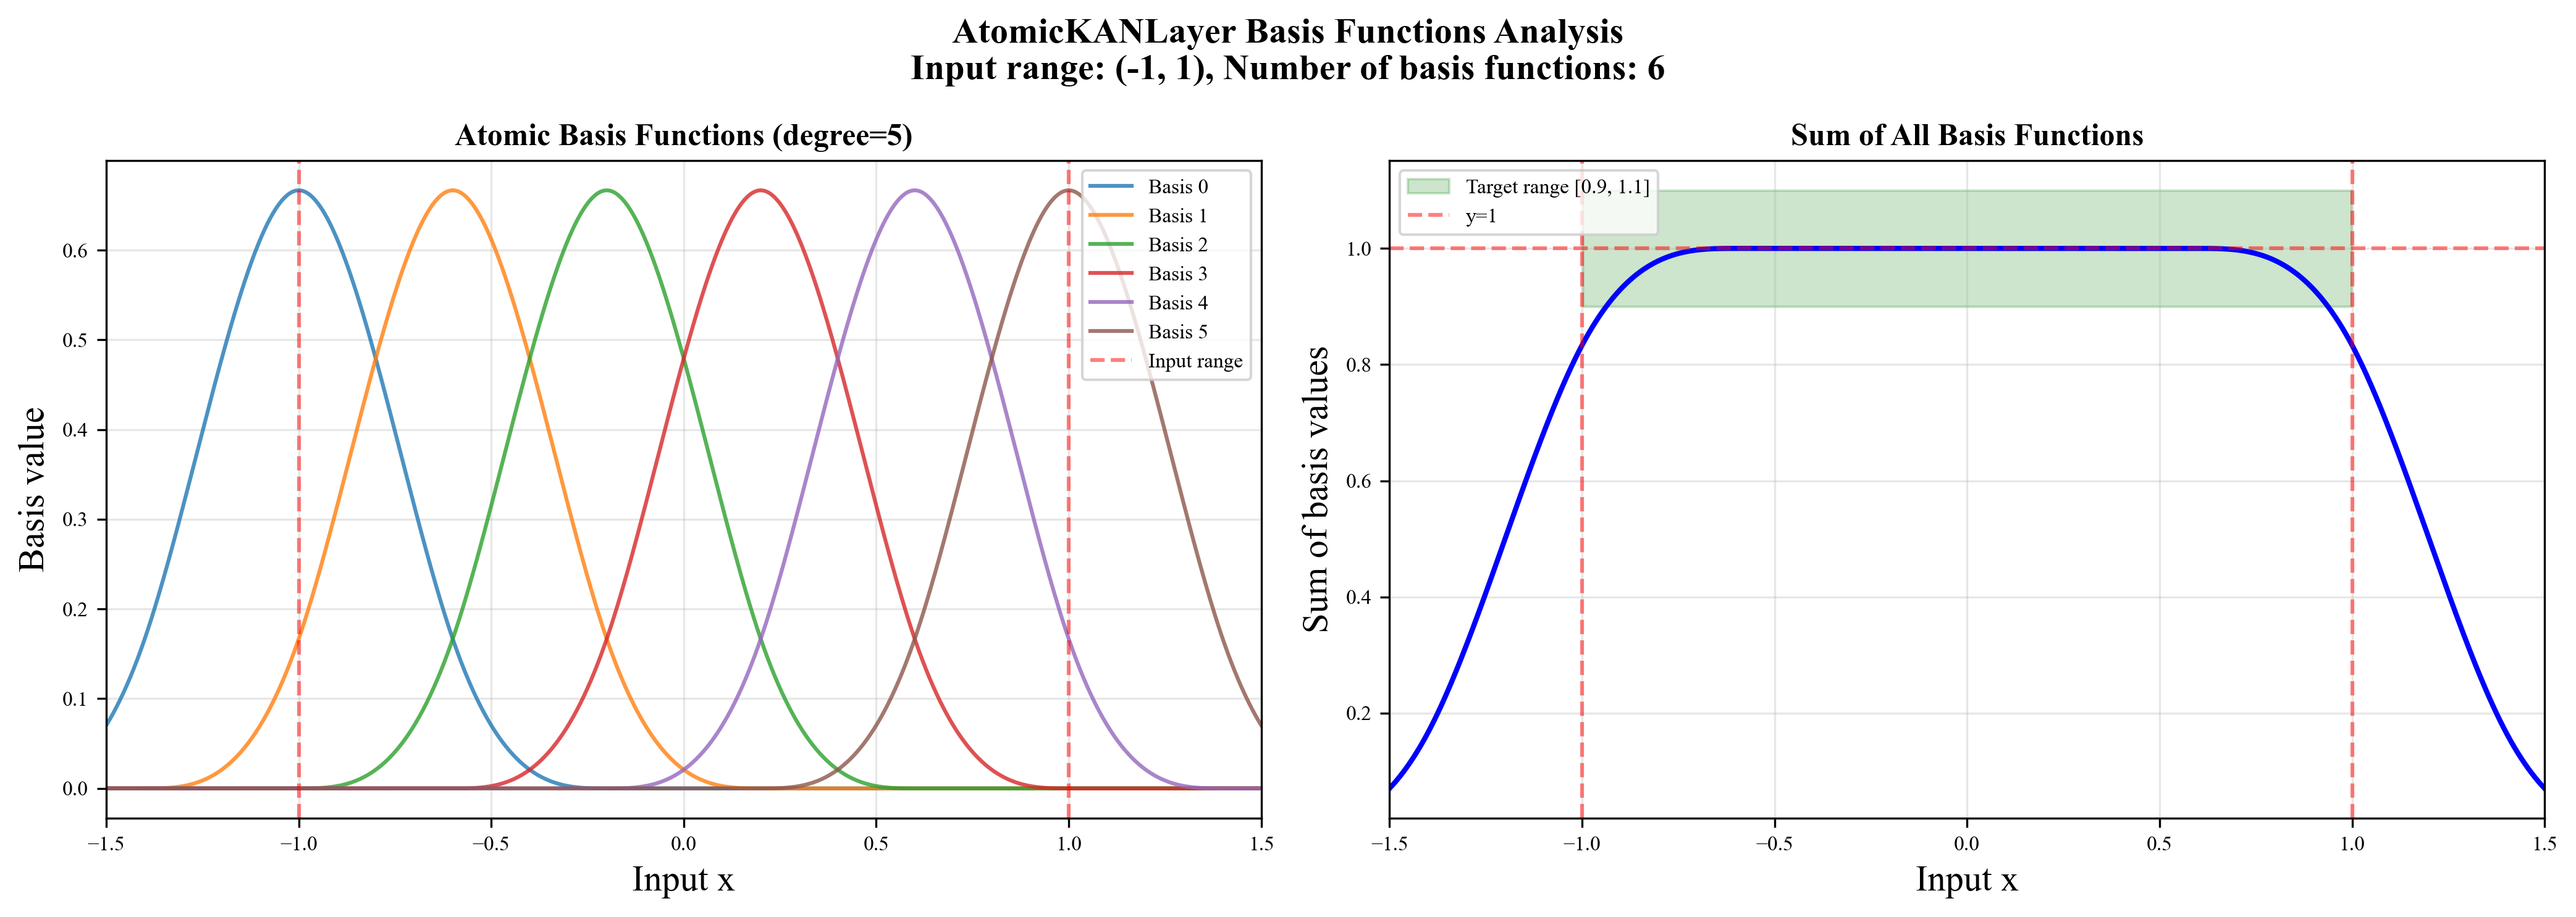

In [80]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def visualize_atomic_basis():
    # Параметры слоя для визуализации
    input_range = (-1, 1)
    degree = 5  # Количество базисных функций - 1
    nsum = 100
    nprod = 10

    # Создаем слой для анализа
    layer = AtomicKANLayer(
        input_dim=1,  # Для визуализации достаточно 1D входа
        output_dim=1,  # Для визуализации достаточно 1D выхода
        degree=degree,
        input_range=input_range
    )

    # Переводим слой в режим оценки (не обучения)
    layer.eval()

    # Создаем входные данные для визуализации
    x = torch.linspace(input_range[0] - 0.5, input_range[1] + 0.5, 1000)
    x_grid = x.view(-1, 1, 1)  # Формат: (batch, input_dim, 1)

    # Получаем центры и параметры сжатия
    centers = layer.centers.view(1, 1, -1)
    compression = layer.compression.view(1, 1, -1)

    # Вычисляем масштабированные значения
    scaled_x = (x_grid - centers) * compression

    # Вычисляем базисные функции (с torch.no_grad() для отключения градиентов)
    with torch.no_grad():
        atomic_basis = fupn(scaled_x, n=1, nsum=nsum, nprod=nprod)

    # Преобразуем в numpy для визуализации с использованием detach()
    x_np = x.detach().numpy()
    atomic_basis_np = atomic_basis.squeeze().detach().numpy()  # Формат: (1000, degree+1)
    centers_np = layer.centers.detach().numpy()

    # Создаем фигуру с двумя графиками
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # 1. Все базисные функции вместе
    for i in range(degree + 1):
        ax1.plot(x_np, atomic_basis_np[:, i], label=f'Basis {i}', alpha=0.8)
    ax1.axvline(input_range[0], color='r', linestyle='--', alpha=0.5, label='Input range')
    ax1.axvline(input_range[1], color='r', linestyle='--', alpha=0.5)
    ax1.set_title(f'Atomic Basis Functions (degree={degree})', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Input x')
    ax1.set_ylabel('Basis value')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right', fontsize=8)

    # 2. Сумма всех базисных функций (должна быть примерно 1 в рабочей области)
    sum_basis = atomic_basis_np.sum(axis=1)
    ax2.plot(x_np, sum_basis, 'b-', linewidth=2)
    ax2.fill_between(x_np, 0.9, 1.1, where=((x_np >= input_range[0]) & (x_np <= input_range[1])),
                     alpha=0.2, color='green', label='Target range [0.9, 1.1]')
    ax2.axhline(1.0, color='r', linestyle='--', alpha=0.5, label='y=1')
    ax2.axvline(input_range[0], color='r', linestyle='--', alpha=0.5)
    ax2.axvline(input_range[1], color='r', linestyle='--', alpha=0.5)
    ax2.set_title('Sum of All Basis Functions', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Input x')
    ax2.set_ylabel('Sum of basis values')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper left')

    # Устанавливаем одинаковые пределы по x для обоих графиков
    x_min = input_range[0] - 0.5
    x_max = input_range[1] + 0.5
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(x_min, x_max)

    plt.suptitle(f'AtomicKANLayer Basis Functions Analysis\n'
                 f'Input range: {input_range}, Number of basis functions: {degree + 1}',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Запуск визуализации
visualize_atomic_basis()

In [73]:
np.random.seed(42)
torch.manual_seed(42)

C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\4139134222.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = np.exp(-1.4 * x) * np.cos(3.5 * np.pi * x)
C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\4139134222.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y += noise
C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\4139134222.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(target_function(x_train), dtype=torch.float32)
C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\4139134222.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumP

checkpoint directory created: ./model
saving model version 0.0
Epoch 1/300
  AtomicKAN - Loss: 0.2057, RMSE: 0.4164, MAE: 0.3445
  BsplineKAN - Loss: 0.2073, RMSE: 0.4186, MAE: 0.3526
Epoch 11/300
  AtomicKAN - Loss: 0.1523, RMSE: 0.3468, MAE: 0.2790
  BsplineKAN - Loss: 0.1763, RMSE: 0.3789, MAE: 0.3072
Epoch 21/300
  AtomicKAN - Loss: 0.0654, RMSE: 0.1765, MAE: 0.1530
  BsplineKAN - Loss: 0.0479, RMSE: 0.1090, MAE: 0.0835
Epoch 31/300
  AtomicKAN - Loss: 0.0440, RMSE: 0.0734, MAE: 0.0586
  BsplineKAN - Loss: 0.0423, RMSE: 0.0675, MAE: 0.0582
Epoch 41/300
  AtomicKAN - Loss: 0.0425, RMSE: 0.0655, MAE: 0.0585
  BsplineKAN - Loss: 0.0396, RMSE: 0.0427, MAE: 0.0353
Epoch 51/300
  AtomicKAN - Loss: 0.0387, RMSE: 0.0303, MAE: 0.0212
  BsplineKAN - Loss: 0.0386, RMSE: 0.0290, MAE: 0.0235
Epoch 61/300
  AtomicKAN - Loss: 0.0388, RMSE: 0.0344, MAE: 0.0237
  BsplineKAN - Loss: 0.0381, RMSE: 0.0230, MAE: 0.0164
Epoch 71/300
  AtomicKAN - Loss: 0.0383, RMSE: 0.0242, MAE: 0.0198
  BsplineKAN - Lo

C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\4139134222.py:140: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_clean = torch.tensor(target_function2(x_test), dtype=torch.float32)



=== Final Comprehensive Results ===
Metric           | AtomicKAN     | BsplineKAN
---------------------------------------------
RMSE            | 0.027540     | 0.052795
MAE             | 0.019451     | 0.041704
MAPE (%)        | 1197181.6406      | 3513078.9062
Max Error       | 0.134021     | 0.242772
R² Score        | 0.995577     | 0.983745
Correlation     | 0.997888     | 0.991844
NRMSE           | 0.016435     | 0.031506


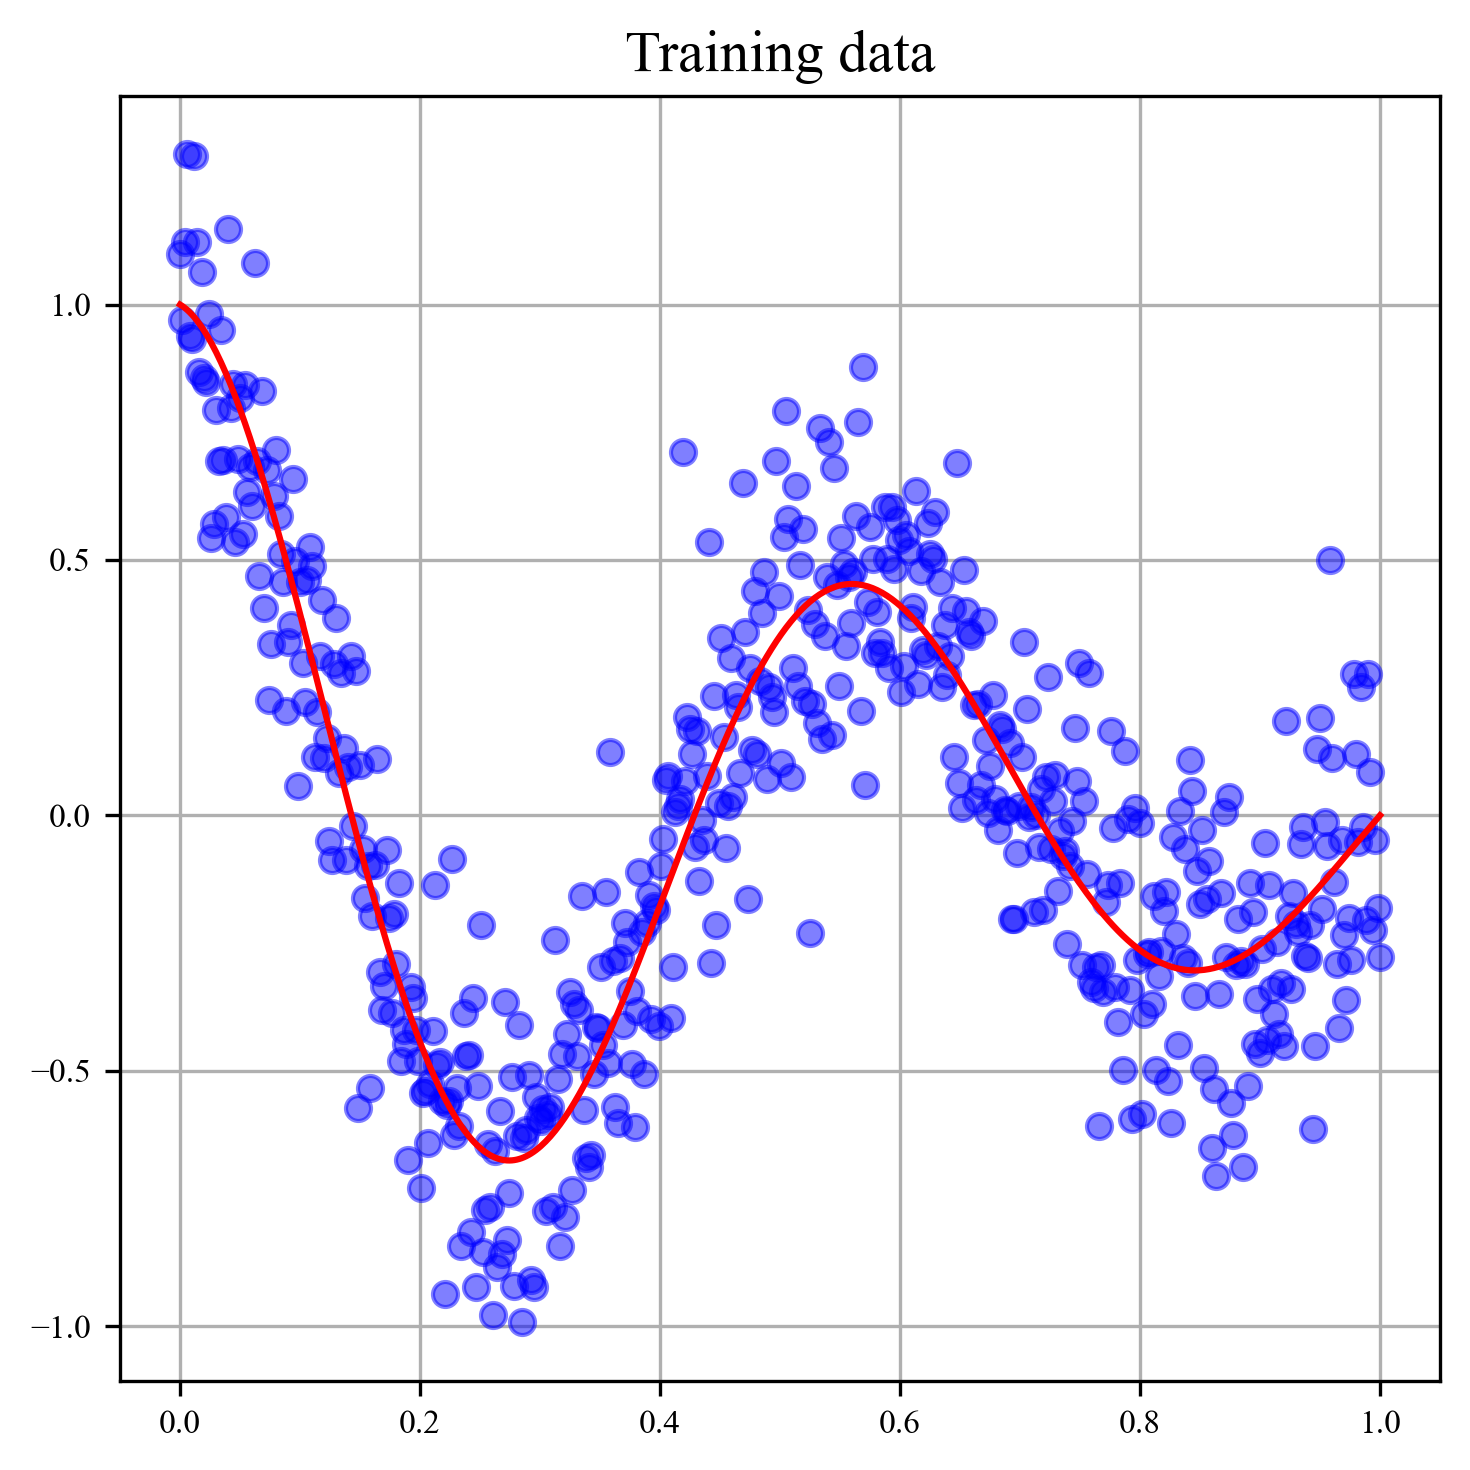

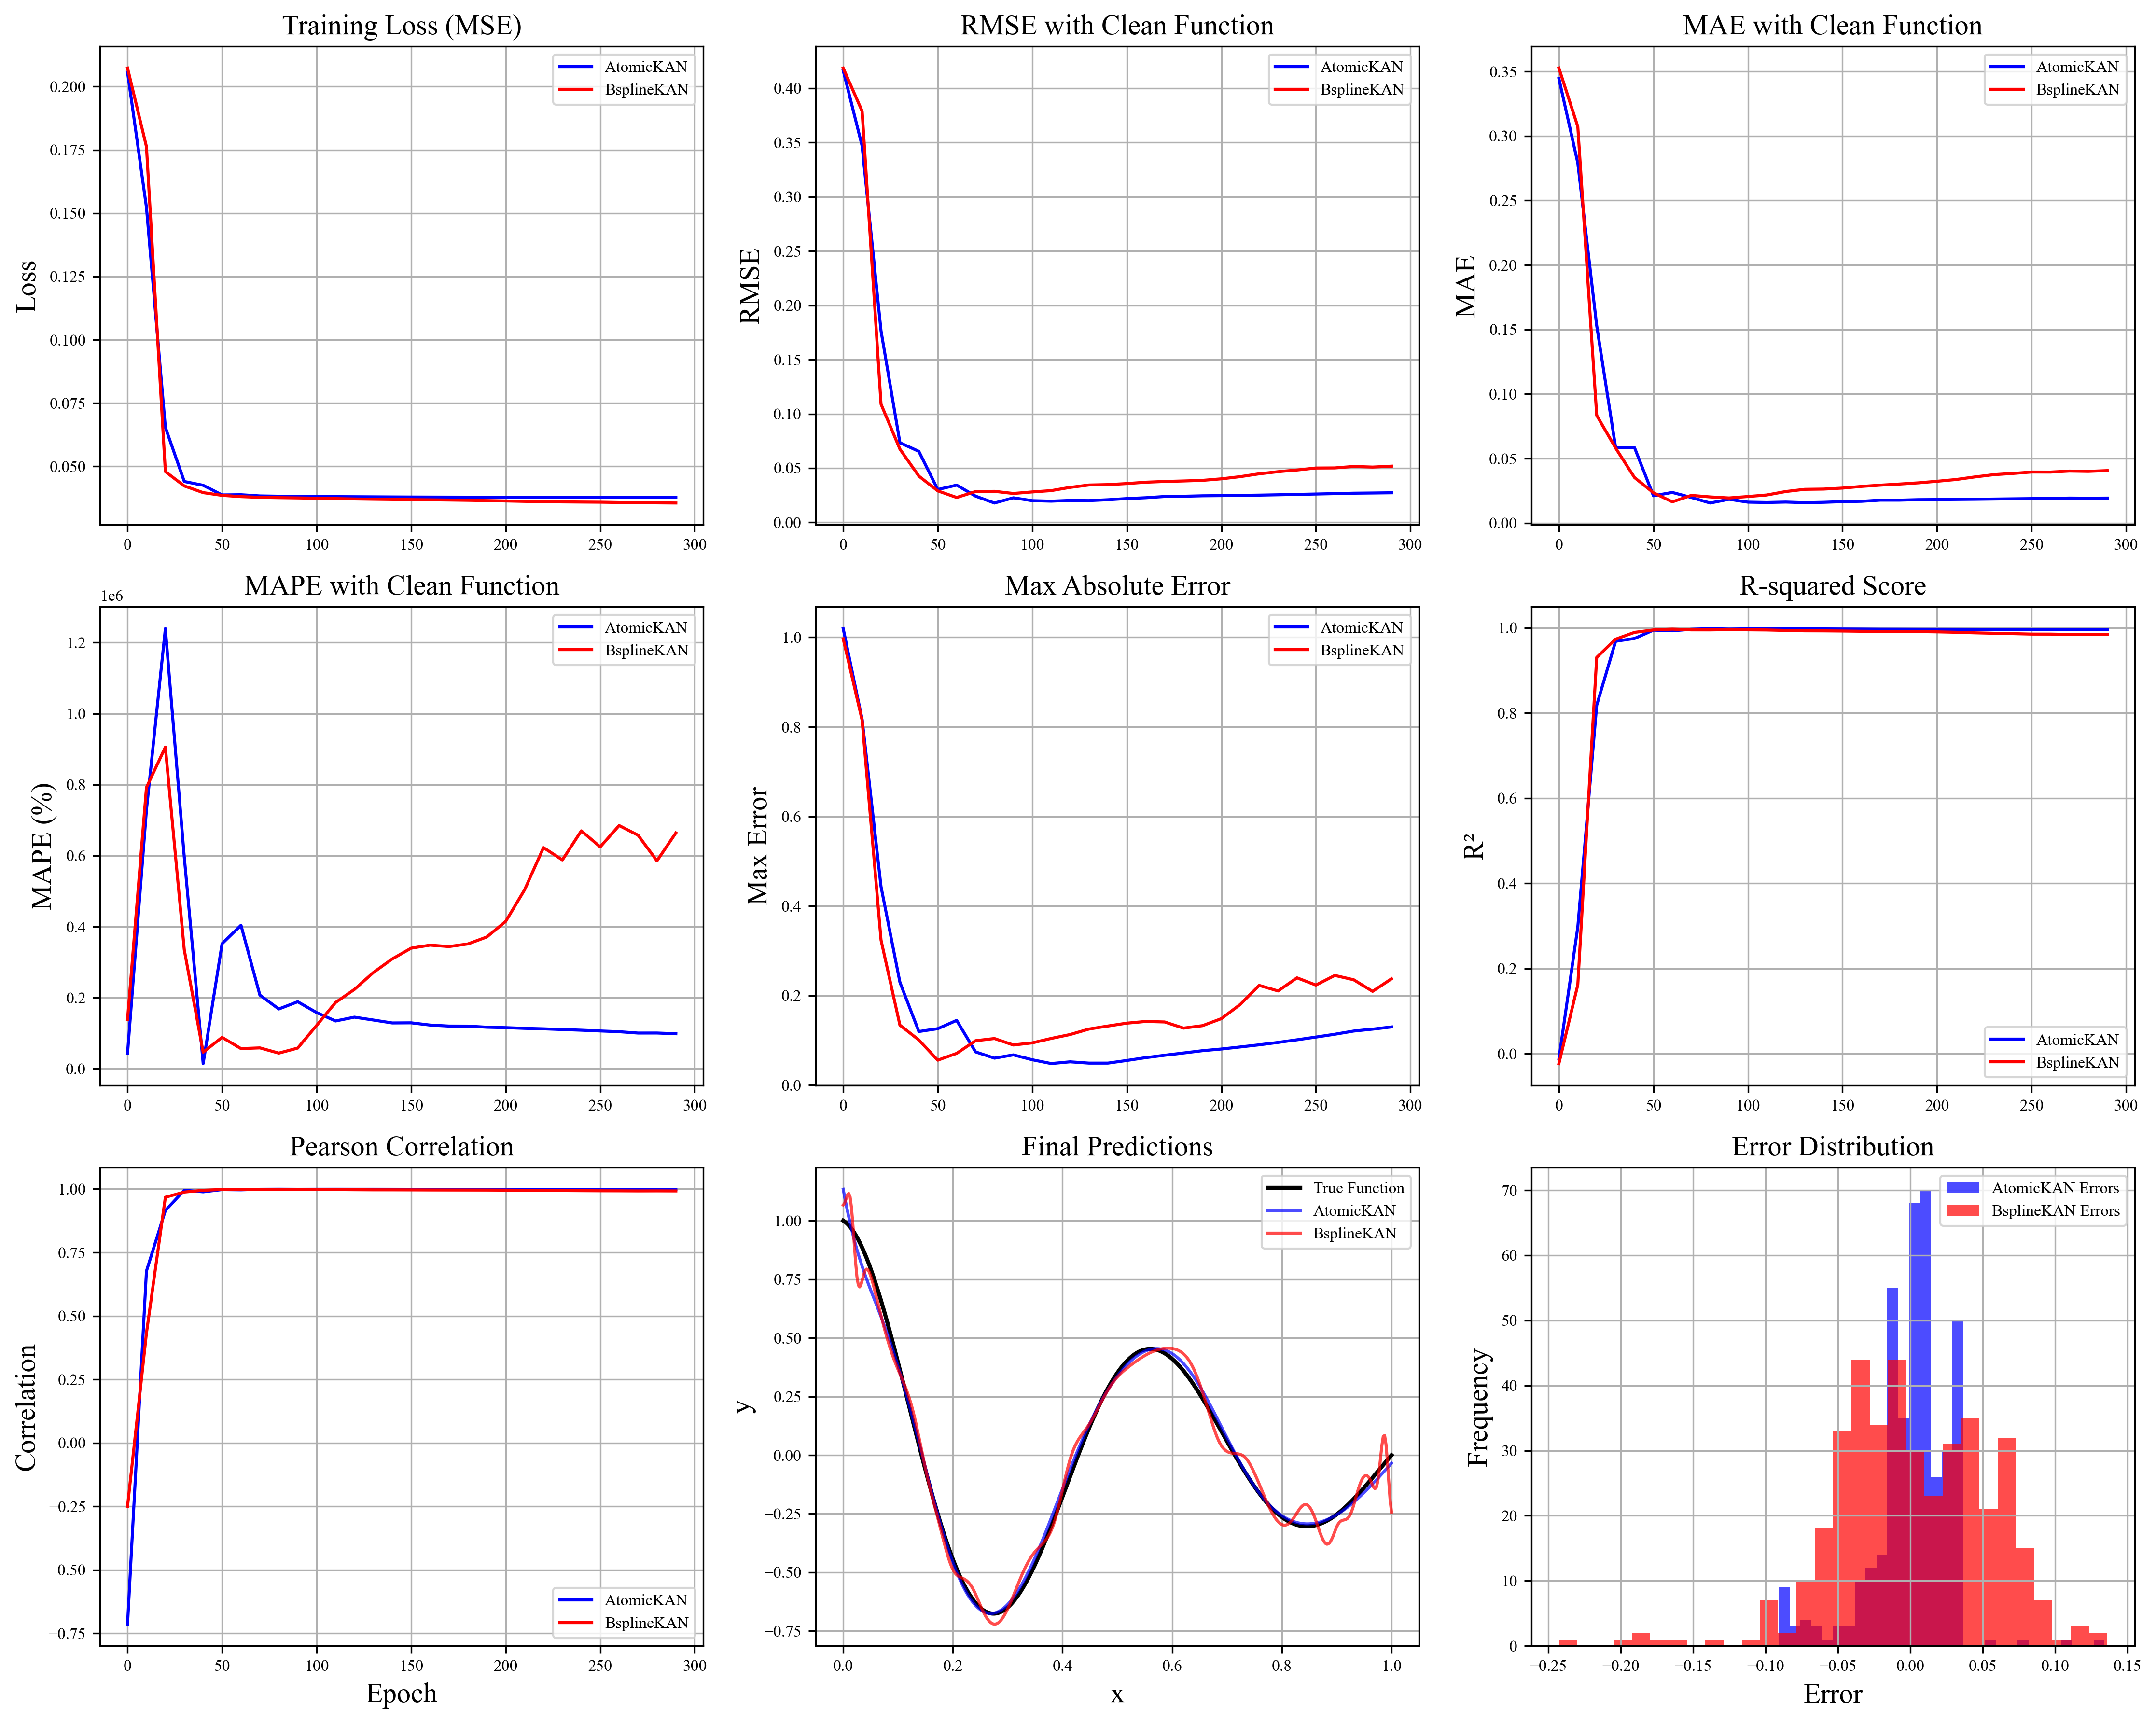

In [74]:


def target_function(x): # Santner et al. (2003) Damped Cosine Function with noise
    y = np.exp(-1.4 * x) * np.cos(3.5 * np.pi * x)
    noise = np.random.normal(0, 0.2, y.shape)
    y += noise
    return y

def target_function2(x): # Santner et al. (2003) Damped Cosine Function without noise
    y = np.exp(-1.4 * x) * np.cos(3.5 * np.pi * x)
    return y

x_train = torch.linspace(0, 1, 500).unsqueeze(1)
y_train = torch.tensor(target_function(x_train), dtype=torch.float32)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x_train, y_train, 'o', color='blue', alpha=0.5)
ax.plot(x_train, target_function2(x_train), '-', color='red')
ax.set_title('Training data')
ax.grid()
fig.tight_layout()



bspline_model = KAN(width=[1, 8, 8, 1], grid=8, k=3, seed=42)

optimizer_bspline = torch.optim.Adam(bspline_model.parameters(), lr=0.01)
bspline_losses = []

class AtomicKAN(nn.Module):
    def __init__(self):
        super(AtomicKAN, self).__init__()
        self.atomkan1 = AtomicKANLayer(1, 8, 8)
        self.atomkan2 = AtomicKANLayer(8, 1, 8)

    def forward(self, x):
        x = self.atomkan1(x)
        x = self.atomkan2(x)
        return x

# Instantiate models
atomic_model = AtomicKAN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer_atom = torch.optim.Adam(atomic_model.parameters(), lr=0.01)

# Additional comprehensive metrics
atom_losses = []

# Additional metrics for comparison with original function
atom_rmse_clean = []  # RMSE with clean target function
bspline_rmse_clean = []  # RMSE with clean target function
atom_r2 = []  # R-squared score
bspline_r2 = []  # R-squared score
atom_mae_clean = []  # Mean Absolute Error
bspline_mae_clean = []
atom_mape_clean = []  # Mean Absolute Percentage Error
bspline_mape_clean = []
atom_max_error = []   # Maximum Absolute Error
bspline_max_error = []
atom_corr_coef = []   # Pearson correlation coefficient
bspline_corr_coef = []

# Train the models
epochs = 300
epoch_step = 10

for epoch in range(epochs):
    # AtomicKAN training
    optimizer_atom.zero_grad()
    outputs_atom = atomic_model(x_train)
    loss_atom = criterion(outputs_atom, y_train)
    loss_atom.backward()
    optimizer_atom.step()

    # B-spline KAN training
    optimizer_bspline.zero_grad()
    outputs_bspline = bspline_model(x_train)
    loss_bspline = criterion(outputs_bspline, y_train)
    loss_bspline.backward()
    optimizer_bspline.step()


    if epoch % epoch_step == 0:
        atom_losses.append(loss_atom.item())
        bspline_losses.append(loss_bspline.item())

        # Calculate comprehensive metrics
        with torch.no_grad():
            y_clean = torch.tensor(target_function2(x_train), dtype=torch.float32)

            # RMSE
            atom_rmse = torch.sqrt(criterion(outputs_atom, y_clean)).item()
            bspline_rmse = torch.sqrt(criterion(outputs_bspline, y_clean)).item()

            # MAE (Mean Absolute Error)
            atom_mae = torch.mean(torch.abs(outputs_atom - y_clean)).item()
            bspline_mae = torch.mean(torch.abs(outputs_bspline - y_clean)).item()

            # MAPE (Mean Absolute Percentage Error)
            atom_mape = torch.mean(torch.abs((outputs_atom - y_clean) / y_clean)).item() * 100
            bspline_mape = torch.mean(torch.abs((outputs_bspline - y_clean) / y_clean)).item() * 100

            # Max Absolute Error
            atom_max_err = torch.max(torch.abs(outputs_atom - y_clean)).item()
            bspline_max_err = torch.max(torch.abs(outputs_bspline - y_clean)).item()

            # Pearson Correlation Coefficient
            atom_corr = pearsonr(outputs_atom.numpy().flatten(), y_clean.numpy().flatten())[0]
            bspline_corr = pearsonr(outputs_bspline.numpy().flatten(), y_clean.numpy().flatten())[0]

            # R-squared
            def r_squared(pred, target):
                ss_res = torch.sum((pred - target) ** 2)
                ss_tot = torch.sum((target - torch.mean(target)) ** 2)
                return 1 - ss_res / ss_tot

            atom_r2_score = r_squared(outputs_atom, y_clean).item()
            bspline_r2_score = r_squared(outputs_bspline, y_clean).item()

            # Store metrics
            atom_rmse_clean.append(atom_rmse)
            bspline_rmse_clean.append(bspline_rmse)
            atom_mae_clean.append(atom_mae)
            bspline_mae_clean.append(bspline_mae)
            atom_mape_clean.append(atom_mape)
            bspline_mape_clean.append(bspline_mape)
            atom_max_error.append(atom_max_err)
            bspline_max_error.append(bspline_max_err)
            atom_corr_coef.append(atom_corr)
            bspline_corr_coef.append(bspline_corr)
            atom_r2.append(atom_r2_score)
            bspline_r2.append(bspline_r2_score)

        print(f'Epoch {epoch + 1}/{epochs}')
        print(f'  AtomicKAN - Loss: {loss_atom.item():.4f}, RMSE: {atom_rmse:.4f}, MAE: {atom_mae:.4f}')
        print(f'  BsplineKAN - Loss: {loss_bspline.item():.4f}, RMSE: {bspline_rmse:.4f}, MAE: {bspline_mae:.4f}')

# Final evaluation on test data
x_test = torch.linspace(0, 1, steps=400).unsqueeze(1)
y_test_clean = torch.tensor(target_function2(x_test), dtype=torch.float32)

y_pred_atom = atomic_model(x_test).detach()
y_pred_bspline = bspline_model(x_test).detach()

# Comprehensive final evaluation
with torch.no_grad():
    # All metrics on test data
    def calculate_all_metrics(pred, true):
        metrics = {}
        metrics['rmse'] = torch.sqrt(criterion(pred, true)).item()
        metrics['mae'] = torch.mean(torch.abs(pred - true)).item()
        metrics['mape'] = torch.mean(torch.abs((pred - true) / true)).item() * 100
        metrics['max_error'] = torch.max(torch.abs(pred - true)).item()
        metrics['correlation'] = pearsonr(pred.numpy().flatten(), true.numpy().flatten())[0]

        ss_res = torch.sum((pred - true) ** 2)
        ss_tot = torch.sum((true - torch.mean(true)) ** 2)
        metrics['r2'] = 1 - ss_res / ss_tot

        # Additional: NRMSE (Normalized RMSE)
        metrics['nrmse'] = metrics['rmse'] / (torch.max(true) - torch.min(true))

        return metrics

    atom_metrics = calculate_all_metrics(y_pred_atom, y_test_clean)
    bspline_metrics = calculate_all_metrics(y_pred_bspline, y_test_clean)

print("\n=== Final Comprehensive Results ===")
print("Metric           | AtomicKAN     | BsplineKAN")
print("-" * 45)
print(f"RMSE            | {atom_metrics['rmse']:.6f}     | {bspline_metrics['rmse']:.6f}")
print(f"MAE             | {atom_metrics['mae']:.6f}     | {bspline_metrics['mae']:.6f}")
print(f"MAPE (%)        | {atom_metrics['mape']:.4f}      | {bspline_metrics['mape']:.4f}")
print(f"Max Error       | {atom_metrics['max_error']:.6f}     | {bspline_metrics['max_error']:.6f}")
print(f"R² Score        | {atom_metrics['r2']:.6f}     | {bspline_metrics['r2']:.6f}")
print(f"Correlation     | {atom_metrics['correlation']:.6f}     | {bspline_metrics['correlation']:.6f}")
print(f"NRMSE           | {atom_metrics['nrmse']:.6f}     | {bspline_metrics['nrmse']:.6f}")

# Plot comprehensive comparison
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Row 1: Basic error metrics
axes[0, 0].plot(range(0, epochs, epoch_step), atom_losses, 'b-', label='AtomicKAN')
axes[0, 0].plot(range(0, epochs, epoch_step), bspline_losses, 'r-', label='BsplineKAN')
axes[0, 0].set_title('Training Loss (MSE)')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(range(0, epochs, epoch_step), atom_rmse_clean, 'b-', label='AtomicKAN')
axes[0, 1].plot(range(0, epochs, epoch_step), bspline_rmse_clean, 'r-', label='BsplineKAN')
axes[0, 1].set_title('RMSE with Clean Function')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].legend()
axes[0, 1].grid()

axes[0, 2].plot(range(0, epochs, epoch_step), atom_mae_clean, 'b-', label='AtomicKAN')
axes[0, 2].plot(range(0, epochs, epoch_step), bspline_mae_clean, 'r-', label='BsplineKAN')
axes[0, 2].set_title('MAE with Clean Function')
axes[0, 2].set_ylabel('MAE')
axes[0, 2].legend()
axes[0, 2].grid()

# Row 2: Advanced metrics
axes[1, 0].plot(range(0, epochs, epoch_step), atom_mape_clean, 'b-', label='AtomicKAN')
axes[1, 0].plot(range(0, epochs, epoch_step), bspline_mape_clean, 'r-', label='BsplineKAN')
axes[1, 0].set_title('MAPE with Clean Function')
axes[1, 0].set_ylabel('MAPE (%)')
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].plot(range(0, epochs, epoch_step), atom_max_error, 'b-', label='AtomicKAN')
axes[1, 1].plot(range(0, epochs, epoch_step), bspline_max_error, 'r-', label='BsplineKAN')
axes[1, 1].set_title('Max Absolute Error')
axes[1, 1].set_ylabel('Max Error')
axes[1, 1].legend()
axes[1, 1].grid()

axes[1, 2].plot(range(0, epochs, epoch_step), atom_r2, 'b-', label='AtomicKAN')
axes[1, 2].plot(range(0, epochs, epoch_step), bspline_r2, 'r-', label='BsplineKAN')
axes[1, 2].set_title('R-squared Score')
axes[1, 2].set_ylabel('R²')
axes[1, 2].legend()
axes[1, 2].grid()

# Row 3: Correlation and final results
axes[2, 0].plot(range(0, epochs, epoch_step), atom_corr_coef, 'b-', label='AtomicKAN')
axes[2, 0].plot(range(0, epochs, epoch_step), bspline_corr_coef, 'r-', label='BsplineKAN')
axes[2, 0].set_title('Pearson Correlation')
axes[2, 0].set_ylabel('Correlation')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].legend()
axes[2, 0].grid()

# Final predictions comparison
axes[2, 1].plot(x_test, y_test_clean, 'k-', label='True Function', linewidth=2)
axes[2, 1].plot(x_test, y_pred_atom, 'b-', label='AtomicKAN', alpha=0.7)
axes[2, 1].plot(x_test, y_pred_bspline, 'r-', label='BsplineKAN', alpha=0.7)
axes[2, 1].set_title('Final Predictions')
axes[2, 1].set_xlabel('x')
axes[2, 1].set_ylabel('y')
axes[2, 1].legend()
axes[2, 1].grid()

# Error distribution
axes[2, 2].hist((y_pred_atom - y_test_clean).numpy().flatten(), bins=30, alpha=0.7,
                color='blue', label='AtomicKAN Errors')
axes[2, 2].hist((y_pred_bspline - y_test_clean).numpy().flatten(), bins=30, alpha=0.7,
                color='red', label='BsplineKAN Errors')
axes[2, 2].set_title('Error Distribution')
axes[2, 2].set_xlabel('Error')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].legend()
axes[2, 2].grid()

plt.tight_layout()
plt.show()

C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\2690158657.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = (6 * x - 2) ** 2 * np.sin(12 * x - 4)
C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\2690158657.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y += noise
C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\2690158657.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(target_function(x_train), dtype=torch.float32)
C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\2690158657.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0

checkpoint directory created: ./model
saving model version 0.0
Epoch 1/300
  AtomicKAN - Loss: 23.3828, RMSE: 4.5048, MAE: 2.6015
  BsplineKAN - Loss: 23.3077, RMSE: 4.4967, MAE: 2.6012


C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\2690158657.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_clean = torch.tensor(target_function2(x_train), dtype=torch.float32)


Epoch 11/300
  AtomicKAN - Loss: 22.3942, RMSE: 4.3932, MAE: 2.6145
  BsplineKAN - Loss: 21.5005, RMSE: 4.2860, MAE: 2.5575
Epoch 21/300
  AtomicKAN - Loss: 20.2096, RMSE: 4.1290, MAE: 2.4696
  BsplineKAN - Loss: 17.3856, RMSE: 3.7472, MAE: 2.3511
Epoch 31/300
  AtomicKAN - Loss: 17.1387, RMSE: 3.7185, MAE: 2.2555
  BsplineKAN - Loss: 9.9950, RMSE: 2.5474, MAE: 1.4875
Epoch 41/300
  AtomicKAN - Loss: 13.7520, RMSE: 3.2256, MAE: 1.8498
  BsplineKAN - Loss: 4.7148, RMSE: 0.9758, MAE: 0.4862
Epoch 51/300
  AtomicKAN - Loss: 10.8459, RMSE: 2.7166, MAE: 1.5063
  BsplineKAN - Loss: 3.7775, RMSE: 0.2617, MAE: 0.2064
Epoch 61/300
  AtomicKAN - Loss: 8.6850, RMSE: 2.2602, MAE: 1.2840
  BsplineKAN - Loss: 3.8034, RMSE: 0.3416, MAE: 0.2613
Epoch 71/300
  AtomicKAN - Loss: 6.9383, RMSE: 1.8039, MAE: 0.9745
  BsplineKAN - Loss: 3.7217, RMSE: 0.2915, MAE: 0.2140
Epoch 81/300
  AtomicKAN - Loss: 5.6656, RMSE: 1.3838, MAE: 0.6779
  BsplineKAN - Loss: 3.6993, RMSE: 0.3448, MAE: 0.2687
Epoch 91/300
  At

C:\Users\eghor\AppData\Local\Temp\ipykernel_15000\2690158657.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_clean = torch.tensor(target_function2(x_test), dtype=torch.float32)



=== Final Comprehensive Results ===
Metric           | AtomicKAN     | BsplineKAN
---------------------------------------------
RMSE            | 0.325344     | 0.560879
MAE             | 0.255765     | 0.398896
MAPE (%)        | inf      | inf
Max Error       | 0.933230     | 2.152167
R² Score        | 0.994737     | 0.984358
Correlation     | 0.997463     | 0.992188
NRMSE           | 0.014890     | 0.025669


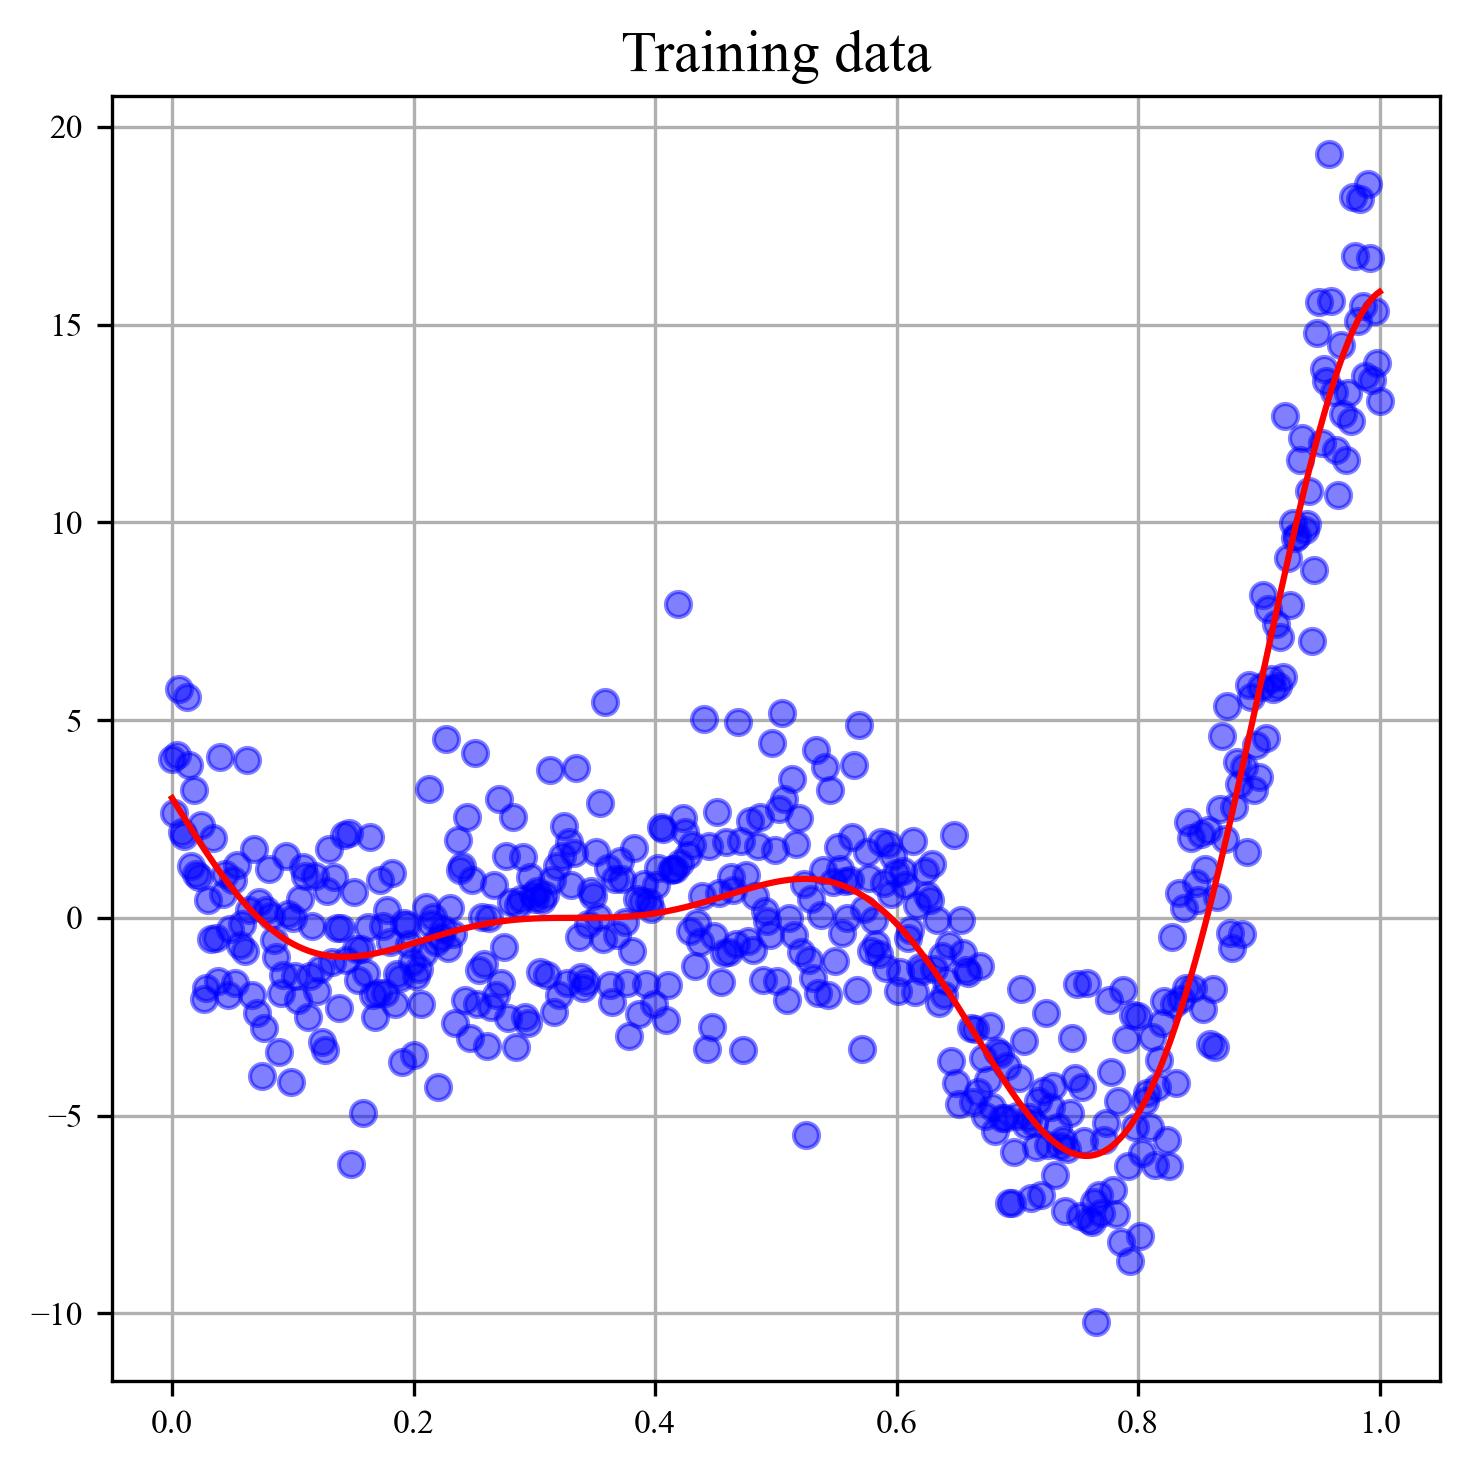

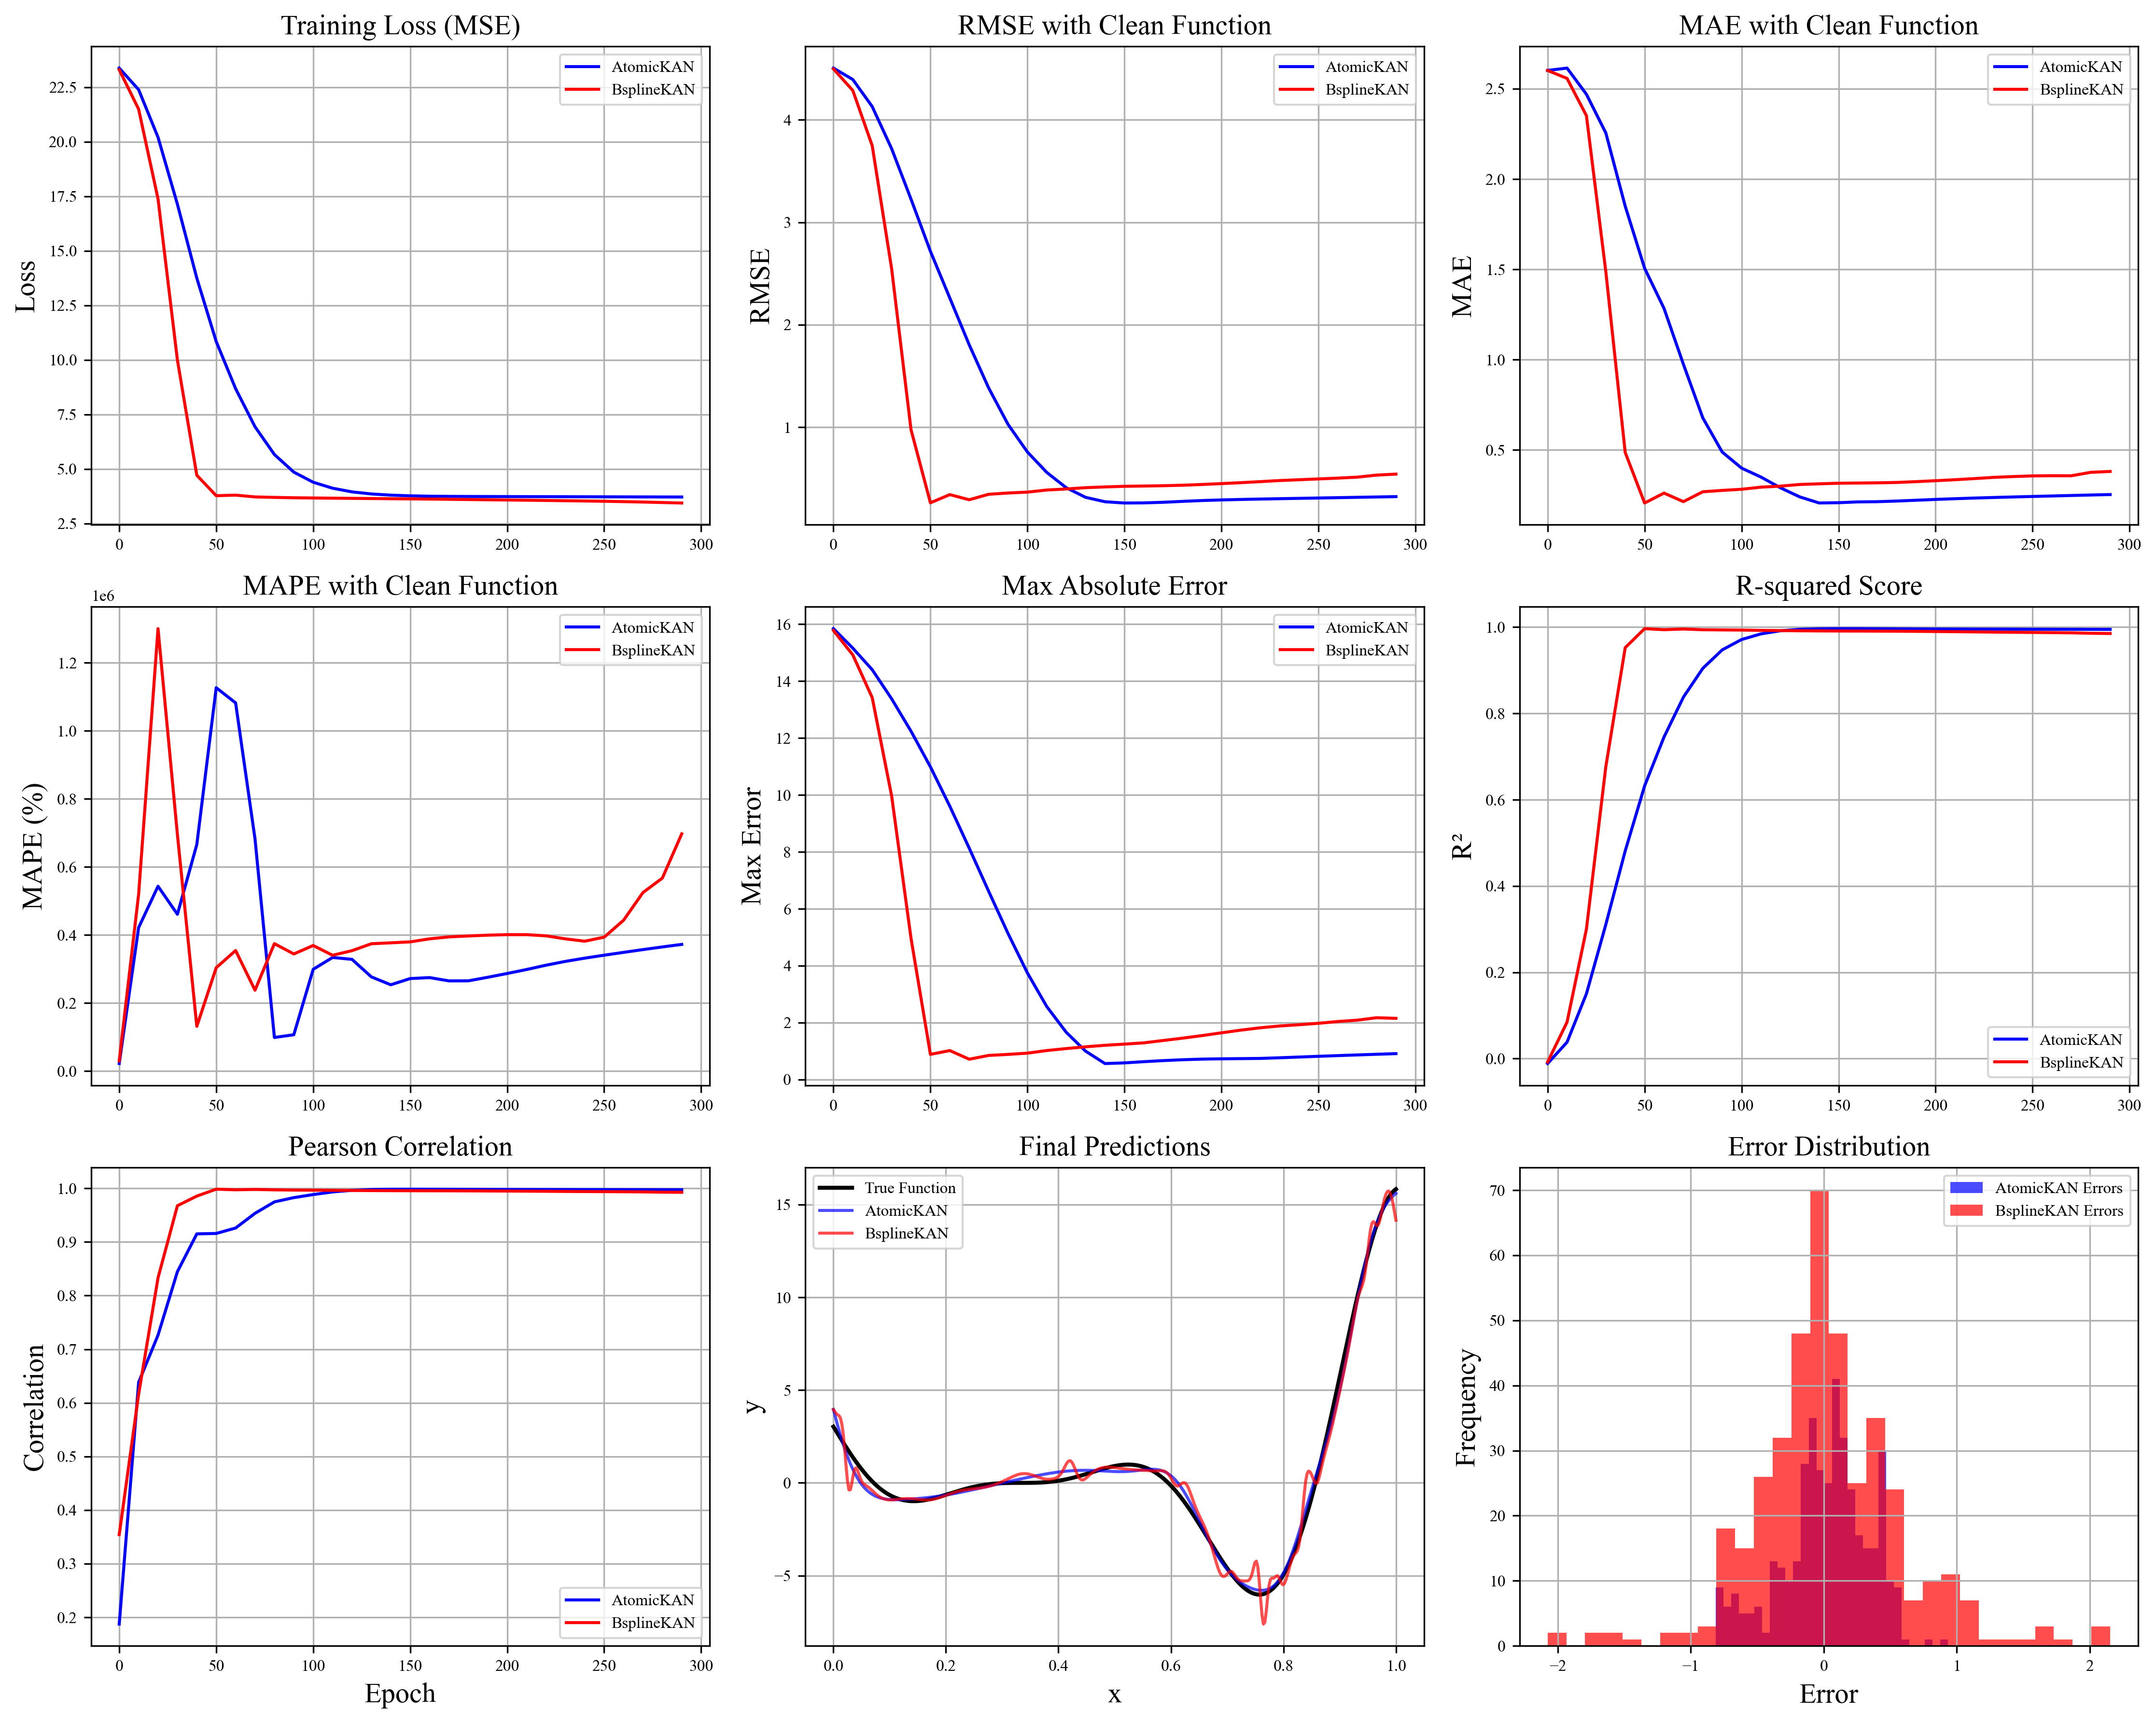

In [65]:

def target_function(x): # Forrester et al. (2008) Function with noise
    y = (6 * x - 2) ** 2 * np.sin(12 * x - 4)
    # add noise
    noise = np.random.normal(0, 2, y.shape)
    y += noise
    return y

def target_function2(x): # Forrester et al. (2008) Function without noise
    y = (6 * x - 2) ** 2 * np.sin(12 * x - 4)
    return y

x_train = torch.linspace(0, 1, 500).unsqueeze(1)
y_train = torch.tensor(target_function(x_train), dtype=torch.float32)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x_train, y_train, 'o', color='blue', alpha=0.5)
ax.plot(x_train, target_function2(x_train), '-', color='red')
ax.set_title('Training data')
ax.grid()
fig.tight_layout()



bspline_model = KAN(width=[1, 8, 8, 1], grid=8, k=3, seed=42)

optimizer_bspline = torch.optim.Adam(bspline_model.parameters(), lr=0.01)
bspline_losses = []

class AtomicKAN(nn.Module):
    def __init__(self):
        super(AtomicKAN, self).__init__()
        self.atomkan1 = AtomicKANLayer(1, 8, 8)
        self.atomkan2 = AtomicKANLayer(8, 1, 8)

    def forward(self, x):
        x = self.atomkan1(x)
        x = self.atomkan2(x)
        return x

# Instantiate models
atomic_model = AtomicKAN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer_atom = torch.optim.Adam(atomic_model.parameters(), lr=0.01)

# Additional comprehensive metrics
atom_losses = []

# Additional metrics for comparison with original function
atom_rmse_clean = []  # RMSE with clean target function
bspline_rmse_clean = []  # RMSE with clean target function
atom_r2 = []  # R-squared score
bspline_r2 = []  # R-squared score
atom_mae_clean = []  # Mean Absolute Error
bspline_mae_clean = []
atom_mape_clean = []  # Mean Absolute Percentage Error
bspline_mape_clean = []
atom_max_error = []   # Maximum Absolute Error
bspline_max_error = []
atom_corr_coef = []   # Pearson correlation coefficient
bspline_corr_coef = []

# Train the models
epochs = 300
epoch_step = 10

for epoch in range(epochs):
    # AtomicKAN training
    optimizer_atom.zero_grad()
    outputs_atom = atomic_model(x_train)
    loss_atom = criterion(outputs_atom, y_train)
    loss_atom.backward()
    optimizer_atom.step()

    # B-spline KAN training
    optimizer_bspline.zero_grad()
    outputs_bspline = bspline_model(x_train)
    loss_bspline = criterion(outputs_bspline, y_train)
    loss_bspline.backward()
    optimizer_bspline.step()


    if epoch % epoch_step == 0:
        atom_losses.append(loss_atom.item())
        bspline_losses.append(loss_bspline.item())

        # Calculate comprehensive metrics
        with torch.no_grad():
            y_clean = torch.tensor(target_function2(x_train), dtype=torch.float32)

            # RMSE
            atom_rmse = torch.sqrt(criterion(outputs_atom, y_clean)).item()
            bspline_rmse = torch.sqrt(criterion(outputs_bspline, y_clean)).item()

            # MAE (Mean Absolute Error)
            atom_mae = torch.mean(torch.abs(outputs_atom - y_clean)).item()
            bspline_mae = torch.mean(torch.abs(outputs_bspline - y_clean)).item()

            # MAPE (Mean Absolute Percentage Error)
            atom_mape = torch.mean(torch.abs((outputs_atom - y_clean) / y_clean)).item() * 100
            bspline_mape = torch.mean(torch.abs((outputs_bspline - y_clean) / y_clean)).item() * 100

            # Max Absolute Error
            atom_max_err = torch.max(torch.abs(outputs_atom - y_clean)).item()
            bspline_max_err = torch.max(torch.abs(outputs_bspline - y_clean)).item()

            # Pearson Correlation Coefficient
            atom_corr = pearsonr(outputs_atom.numpy().flatten(), y_clean.numpy().flatten())[0]
            bspline_corr = pearsonr(outputs_bspline.numpy().flatten(), y_clean.numpy().flatten())[0]

            # R-squared
            def r_squared(pred, target):
                ss_res = torch.sum((pred - target) ** 2)
                ss_tot = torch.sum((target - torch.mean(target)) ** 2)
                return 1 - ss_res / ss_tot

            atom_r2_score = r_squared(outputs_atom, y_clean).item()
            bspline_r2_score = r_squared(outputs_bspline, y_clean).item()

            # Store metrics
            atom_rmse_clean.append(atom_rmse)
            bspline_rmse_clean.append(bspline_rmse)
            atom_mae_clean.append(atom_mae)
            bspline_mae_clean.append(bspline_mae)
            atom_mape_clean.append(atom_mape)
            bspline_mape_clean.append(bspline_mape)
            atom_max_error.append(atom_max_err)
            bspline_max_error.append(bspline_max_err)
            atom_corr_coef.append(atom_corr)
            bspline_corr_coef.append(bspline_corr)
            atom_r2.append(atom_r2_score)
            bspline_r2.append(bspline_r2_score)

        print(f'Epoch {epoch + 1}/{epochs}')
        print(f'  AtomicKAN - Loss: {loss_atom.item():.4f}, RMSE: {atom_rmse:.4f}, MAE: {atom_mae:.4f}')
        print(f'  BsplineKAN - Loss: {loss_bspline.item():.4f}, RMSE: {bspline_rmse:.4f}, MAE: {bspline_mae:.4f}')

# Final evaluation on test data
x_test = torch.linspace(0, 1, steps=400).unsqueeze(1)
y_test_clean = torch.tensor(target_function2(x_test), dtype=torch.float32)

y_pred_atom = atomic_model(x_test).detach()
y_pred_bspline = bspline_model(x_test).detach()

# Comprehensive final evaluation
with torch.no_grad():
    # All metrics on test data
    def calculate_all_metrics(pred, true):
        metrics = {}
        metrics['rmse'] = torch.sqrt(criterion(pred, true)).item()
        metrics['mae'] = torch.mean(torch.abs(pred - true)).item()
        metrics['mape'] = torch.mean(torch.abs((pred - true) / true)).item() * 100
        metrics['max_error'] = torch.max(torch.abs(pred - true)).item()
        metrics['correlation'] = pearsonr(pred.numpy().flatten(), true.numpy().flatten())[0]

        ss_res = torch.sum((pred - true) ** 2)
        ss_tot = torch.sum((true - torch.mean(true)) ** 2)
        metrics['r2'] = 1 - ss_res / ss_tot

        # Additional: NRMSE (Normalized RMSE)
        metrics['nrmse'] = metrics['rmse'] / (torch.max(true) - torch.min(true))

        return metrics

    atom_metrics = calculate_all_metrics(y_pred_atom, y_test_clean)
    bspline_metrics = calculate_all_metrics(y_pred_bspline, y_test_clean)

print("\n=== Final Comprehensive Results ===")
print("Metric           | AtomicKAN     | BsplineKAN")
print("-" * 45)
print(f"RMSE            | {atom_metrics['rmse']:.6f}     | {bspline_metrics['rmse']:.6f}")
print(f"MAE             | {atom_metrics['mae']:.6f}     | {bspline_metrics['mae']:.6f}")
print(f"MAPE (%)        | {atom_metrics['mape']:.4f}      | {bspline_metrics['mape']:.4f}")
print(f"Max Error       | {atom_metrics['max_error']:.6f}     | {bspline_metrics['max_error']:.6f}")
print(f"R² Score        | {atom_metrics['r2']:.6f}     | {bspline_metrics['r2']:.6f}")
print(f"Correlation     | {atom_metrics['correlation']:.6f}     | {bspline_metrics['correlation']:.6f}")
print(f"NRMSE           | {atom_metrics['nrmse']:.6f}     | {bspline_metrics['nrmse']:.6f}")

# Plot comprehensive comparison
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Row 1: Basic error metrics
axes[0, 0].plot(range(0, epochs, epoch_step), atom_losses, 'b-', label='AtomicKAN')
axes[0, 0].plot(range(0, epochs, epoch_step), bspline_losses, 'r-', label='BsplineKAN')
axes[0, 0].set_title('Training Loss (MSE)')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(range(0, epochs, epoch_step), atom_rmse_clean, 'b-', label='AtomicKAN')
axes[0, 1].plot(range(0, epochs, epoch_step), bspline_rmse_clean, 'r-', label='BsplineKAN')
axes[0, 1].set_title('RMSE with Clean Function')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].legend()
axes[0, 1].grid()

axes[0, 2].plot(range(0, epochs, epoch_step), atom_mae_clean, 'b-', label='AtomicKAN')
axes[0, 2].plot(range(0, epochs, epoch_step), bspline_mae_clean, 'r-', label='BsplineKAN')
axes[0, 2].set_title('MAE with Clean Function')
axes[0, 2].set_ylabel('MAE')
axes[0, 2].legend()
axes[0, 2].grid()

# Row 2: Advanced metrics
axes[1, 0].plot(range(0, epochs, epoch_step), atom_mape_clean, 'b-', label='AtomicKAN')
axes[1, 0].plot(range(0, epochs, epoch_step), bspline_mape_clean, 'r-', label='BsplineKAN')
axes[1, 0].set_title('MAPE with Clean Function')
axes[1, 0].set_ylabel('MAPE (%)')
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].plot(range(0, epochs, epoch_step), atom_max_error, 'b-', label='AtomicKAN')
axes[1, 1].plot(range(0, epochs, epoch_step), bspline_max_error, 'r-', label='BsplineKAN')
axes[1, 1].set_title('Max Absolute Error')
axes[1, 1].set_ylabel('Max Error')
axes[1, 1].legend()
axes[1, 1].grid()

axes[1, 2].plot(range(0, epochs, epoch_step), atom_r2, 'b-', label='AtomicKAN')
axes[1, 2].plot(range(0, epochs, epoch_step), bspline_r2, 'r-', label='BsplineKAN')
axes[1, 2].set_title('R-squared Score')
axes[1, 2].set_ylabel('R²')
axes[1, 2].legend()
axes[1, 2].grid()

# Row 3: Correlation and final results
axes[2, 0].plot(range(0, epochs, epoch_step), atom_corr_coef, 'b-', label='AtomicKAN')
axes[2, 0].plot(range(0, epochs, epoch_step), bspline_corr_coef, 'r-', label='BsplineKAN')
axes[2, 0].set_title('Pearson Correlation')
axes[2, 0].set_ylabel('Correlation')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].legend()
axes[2, 0].grid()

# Final predictions comparison
axes[2, 1].plot(x_test, y_test_clean, 'k-', label='True Function', linewidth=2)
axes[2, 1].plot(x_test, y_pred_atom, 'b-', label='AtomicKAN', alpha=0.7)
axes[2, 1].plot(x_test, y_pred_bspline, 'r-', label='BsplineKAN', alpha=0.7)
axes[2, 1].set_title('Final Predictions')
axes[2, 1].set_xlabel('x')
axes[2, 1].set_ylabel('y')
axes[2, 1].legend()
axes[2, 1].grid()

# Error distribution
axes[2, 2].hist((y_pred_atom - y_test_clean).numpy().flatten(), bins=30, alpha=0.7,
                color='blue', label='AtomicKAN Errors')
axes[2, 2].hist((y_pred_bspline - y_test_clean).numpy().flatten(), bins=30, alpha=0.7,
                color='red', label='BsplineKAN Errors')
axes[2, 2].set_title('Error Distribution')
axes[2, 2].set_xlabel('Error')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].legend()
axes[2, 2].grid()

plt.tight_layout()
plt.show()